# Exploratory Analysis of Data

In [93]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
import math

In [94]:
# Define path to data files
f_donations = '../../Documents/Data/donations.csv'
f_essays = '../../Documents/Data/essays.csv'
f_projects = '../../Documents/Data/projects.csv'
f_resources = '../../Documents/Data/resources.csv'
f_outcomes = '../../Documents/Data/outcomes.csv'

Loading the csv files into panda data frame to make it easier to access the data

In [4]:
#load data
data_don = pd.read_csv(f_donations)
print("finished loading donations, total", len(data_don) ,"rows loaded")
data_ess = pd.read_csv(f_essays)
print("finished loading essays, total", len(data_ess) ,"rows loaded")
data_pro = pd.read_csv(f_projects)
print("finished loading projects, total", len(data_pro), "rows loaded")
data_res = pd.read_csv(f_resources)
print("finished loading resources, total", len(data_res), "rows loaded")
data_out = pd.read_csv(f_outcomes)
print("finished loading outcomes, total", len(data_out), "rows loaded")

finished loading donations, total 3097989 rows loaded
finished loading essays, total 664098 rows loaded
finished loading projects, total 664098 rows loaded
finished loading resources, total 3667217 rows loaded
finished loading outcomes, total 619326 rows loaded


First we look at the number of projects executed by schools with different poverty levels

In [96]:
# sort data by projectid to make sure the indizes match
data_don_sort = data_don.sort(['projectid']).reset_index()
data_ess_sort = data_ess.sort(['projectid']).reset_index()
data_pro_sort = data_pro.sort(['projectid']).reset_index()
data_res_sort = data_res.sort(['projectid']).reset_index()
data_out_sort = data_out.sort(['projectid']).reset_index()

/Users/sivers/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/sivers/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/sivers/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/sivers/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/sivers/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [99]:
# counting the number of projects sorted by level of poverty
# Jumper is needed as the data files outcomes.csv and projects.csv do not contain exactly the same number of projects since projects.csv also contains the test set
jumper=0
highestpoverty=0
highpoverty=0
moderatepoverty=0
lowpoverty=0
for i in range(0,len(data_out_sort)):
    if i%100000 == 0:
        print(i)
    while data_out_sort['projectid'][i] != data_pro_sort['projectid'][i+jumper]:
        jumper += 1
    if data_pro_sort['poverty_level'][i+jumper] == 'highest poverty':
        highestpoverty +=1
    if data_pro_sort['poverty_level'][i+jumper] == 'high poverty':
        highpoverty +=1
    if data_pro_sort['poverty_level'][i+jumper] == 'moderate poverty':
        moderatepoverty +=1
    if data_pro_sort['poverty_level'][i+jumper] == 'low poverty':
        lowpoverty +=1

0
100000
200000
300000
400000
500000
600000


Below you can find a tabel of the ratio of the number of projects initialized at schools of different poverty levels per total of projects

In [27]:
print('highest poverty', highestpoverty/len(data_pro_sort))
print('high poverty', highpoverty/len(data_pro_sort))
print('moderate poverty', moderatepoverty/len(data_pro_sort))
print('low poverty', lowpoverty/len(data_pro_sort))

highest poverty 0.5395649437281846
high poverty 0.243845034919545
moderate poverty 0.12618167800535462
low poverty 0.02299058271520167


Let us have a look at how many of the projects were fully funded

In [28]:
jumper=0
fullyfoundedhighest=0
fullyfoundedhigh=0
fullyfoundedmoderate=0
fullyfoundedlow=0
for i in range(0,len(data_out_sort)):
    if i%100000 == 0:
        print(i)
    while data_out_sort['projectid'][i] != data_pro_sort['projectid'][i+jumper]:
        jumper += 1
    if data_pro_sort['poverty_level'][i+jumper] == 'highest poverty' and data_out_sort['fully_funded'][i] == 't':
        fullyfoundedhighest +=1
    if data_pro_sort['poverty_level'][i+jumper] == 'high poverty' and data_out_sort['fully_funded'][i] == 't':
        fullyfoundedhigh +=1
    if data_pro_sort['poverty_level'][i+jumper] == 'moderate poverty' and data_out_sort['fully_funded'][i] == 't':
        fullyfoundedmoderate +=1
    if data_pro_sort['poverty_level'][i+jumper] == 'low poverty' and data_out_sort['fully_funded'][i] == 't':
        fullyfoundedlow +=1        

0
100000
200000
300000
400000
500000
600000


Below you find a tabel with the ratio of fully founded projects sorted by poverty level of school per initialized projects per level of poverty. Additionally, the statistical error is added.

In [47]:
print('fullyfounded highest poverty', fullyfoundedhighest/highestpoverty,"pm",math.sqrt(fullyfoundedhighest/(highestpoverty**2) + fullyfoundedhighest**2/highestpoverty**3))
print('fullyfounded high poverty', fullyfoundedhigh/highpoverty, "pm",math.sqrt(fullyfoundedhigh/(highestpoverty**2) + fullyfoundedhigh**2/highestpoverty**3))
print('fullyfounded moderate poverty', fullyfoundedmoderate/moderatepoverty, "pm",math.sqrt(fullyfoundedmoderate/(highestpoverty**2) + fullyfoundedmoderate**2/highestpoverty**3))
print('fullyfounded low poverty', fullyfoundedlow/lowpoverty, "pm",math.sqrt(fullyfoundedlow/(highestpoverty**2) + fullyfoundedlow**2/highestpoverty**3))

fullyfounded highest poverty 0.7863581563054666 pm 0.00197996046136158
fullyfounded high poverty 0.7136108486633691 pm 0.001091002995757189
fullyfounded moderate poverty 0.70284139050324 pm 0.0007308220010882215
fullyfounded low poverty 0.7313335079905685 pm 0.00029945826908271765


The number of exciting projects per poverty level is counted below. Also, in the same loop the cost per student for exciting projects and all projects is calculated below. This will be used to make a histogram.

In [48]:
jumper=0
isexcitinghighest=0
isexcitinghigh=0
isexcitingmoderate=0
isexcitinglow=0

cost_per_student_exc = []
cost_per_student = []

for i in range(0,len(data_out_sort)):
    if i%100000 == 0:
        print(i)
    while data_out_sort['projectid'][i] != data_pro_sort['projectid'][i+jumper]:
        jumper += 1
    #is exciting per poverty level
    if data_pro_sort['poverty_level'][i+jumper] == 'highest poverty' and data_out_sort['is_exciting'][i] == 't':
        isexcitinghighest +=1
    if data_pro_sort['poverty_level'][i+jumper] == 'high poverty' and data_out_sort['is_exciting'][i] == 't':
        isexcitinghigh +=1
    if data_pro_sort['poverty_level'][i+jumper] == 'moderate poverty' and data_out_sort['is_exciting'][i] == 't':
        isexcitingmoderate +=1
    if data_pro_sort['poverty_level'][i+jumper] == 'low poverty' and data_out_sort['is_exciting'][i] == 't':
        isexcitinglow +=1        
    # cost per student for exciting projects
    if data_out_sort['is_exciting'][i] == 't':
        cost_per_student_exc.append(data_pro_sort['total_price_including_optional_support'][i+jumper]/data_pro_sort['students_reached'][i+jumper])
    # cost per student
    cost_per_student.append(data_pro_sort['total_price_including_optional_support'][i+jumper]/data_pro_sort['students_reached'][i+jumper])

0
100000
200000
300000
400000
500000
600000


The ratio of exciting projects per poverty level of the school and the statistical error are listed below

In [46]:
print('isexciting highest poverty', isexcitinghighest/highestpoverty,"pm",math.sqrt(isexcitinghighest/(highestpoverty**2) + isexcitinghighest**2/highestpoverty**3))
print('isexciting high poverty', isexcitinghigh/highpoverty,"pm",math.sqrt(isexcitinghigh/(highpoverty**2) + isexcitinghigh**2/highpoverty**3))
print('isexciting moderate poverty', isexcitingmoderate/moderatepoverty,"pm",math.sqrt(isexcitingmoderate/(moderatepoverty**2) + isexcitingmoderate**2/moderatepoverty**3))
print('isexciting low poverty', isexcitinglow/lowpoverty,"pm",math.sqrt(isexcitinglow/(lowpoverty**2) + isexcitinglow**2/lowpoverty**3))

isexciting highest poverty 0.06000435360176823 pm 0.00042131532503625975
isexciting high poverty 0.055447488838251915 pm 0.0006011546514954404
isexciting moderate poverty 0.06304521641586214 pm 0.0008943092099243616
isexciting low poverty 0.06202515064186534 pm 0.0020771135511448847


The histogram below shows the number of projects matched to the average cost per student reached, for exciting projects and also for all the projects. The values of the y-axis are logarithmized.

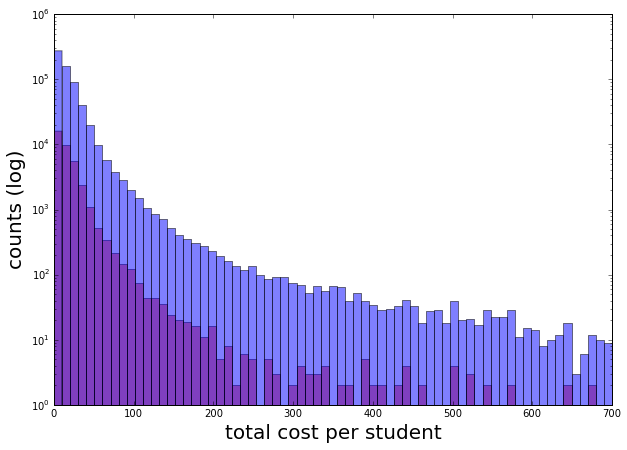

In [54]:
#plot cost per student
plt.figure(figsize=(10,7))
bins = np.linspace(0,700,70)

n1 = plt.hist(cost_per_student_exc, bins, alpha = 0.5, label="test", color='r')
n2 = plt.hist(cost_per_student, bins, alpha = 0.5, label="test", color='b')
plt.yscale('log')
plt.xlabel('total cost per student',fontsize=20)
plt.ylabel('counts (log)', fontsize=20)
plt.show()  

It could be interesting to look at the ratio of the two histograms above. This is displayed below in a scatterplot

In [89]:
n3=[]
n4=[]
for i in range(0,len(n1[0])):
    n3.append(n1[0][i]/n2[0][i])
    n4.append(n1[1][i]+10.14492754/2.) 

/Users/sivers/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


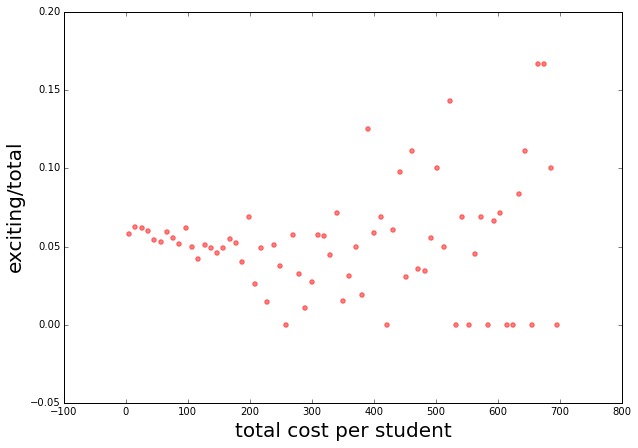

In [92]:
#sucess rate as function of cost per student
plt.figure(figsize=(10,7))
bins = np.linspace(0,700,70)

plt.scatter(n4,n3, alpha = 0.5, label="test", color='r')
plt.xlabel('total cost per student',fontsize=20)
plt.ylabel('exciting/total', fontsize=20)
plt.show()  

## Conclusion
The number of initialized projects at schools with the highest poverty level is especially high. This could be the case as schools with the highest poverty level need to fund a higher number of their projects and low poverty schools can provide the money directly from themselves. What can be seen too is that a very high number of the projects are fully founded not depending on the level of poverty but only a very small number of projects is marked as exciting. In my view this seems to be a problem, either because the parameters for the definition of an exciting project are set in the wrong way or the projects are really not exciting. 
Additionally, I looked at the cost per student only regarding exciting projects and also of all the projects. What can be said is that a higher amount of money does not increase the chance of having an exciting project. Does this mean that exciting projects do not depend on the amount of money spent per student? This should in my view be investigated further.

# A Data Story

In [100]:
data_pro['projectid'][664085]

'00cb0cf6fc2d8bc03493d88a6a453e92'

In [101]:
mathproject=data_ess[data_ess['projectid'].str.contains("00cb0cf6fc2d8bc03493d88a6a453e92")]

In [102]:
mathproject['title']

662067    Make math fun!!!
Name: title, dtype: object

In [103]:
print(mathproject['essay'][662067])

\nSo that I can properly teach my students to use these tools, I need a way to demonstrate to all of them what I am doing on my calculator.  The overhead TI-15 allows me to project what is on my screen so the whole class can participate in the activity.  Thus, we could all discuss how the mathematics behind what we do, making this overhead TI-15 an invaluable tool for my classroom.


In [104]:
mathproject

,projectid,teacher_acctid,title,short_description,need_statement,essay
662067,00cb0cf6fc2d8bc03493d88a6a453e92,dbc7f5e6785159e1a0e203b026ec32ba,Make math fun!!!,I am a fifth grade teacher at IS 174 in the So...,"The cost of this proposal is $102, including s...",I am a fifth grade teacher at IS 174 in the So...


In [105]:
mathproject2=data_pro[data_pro['projectid'].str.contains("00cb0cf6fc2d8bc03493d88a6a453e92")]

In [110]:
mathproject2['primary_focus_area']

664085    Math & Science
Name: primary_focus_area, dtype: object

In [111]:
mathproject2['resource_type']

664085    Technology
Name: resource_type, dtype: object

In [112]:
mathproject2['poverty_level']

664085    highest poverty
Name: poverty_level, dtype: object

In [113]:
mathproject2['grade_level']

664085    Grades 6-8
Name: grade_level, dtype: object

In [114]:
mathproject2['fulfillment_labor_materials']

664085   NaN
Name: fulfillment_labor_materials, dtype: float64

In [115]:
mathproject2['total_price_including_optional_support']

664085    101.22
Name: total_price_including_optional_support, dtype: float64

In [116]:
mathproject2['total_price_excluding_optional_support']

664085    83
Name: total_price_excluding_optional_support, dtype: float64

In [117]:
mathproject3=data_out[data_out['projectid'].str.contains("00cb0cf6fc2d8bc03493d88a6a453e92")]

In [118]:
mathproject3['is_exciting']

617423    f
Name: is_exciting, dtype: object

In [119]:
mathproject3['fully_funded']

617423    t
Name: fully_funded, dtype: object

In [120]:
mathproject3['teacher_referred_count']

617423    0
Name: teacher_referred_count, dtype: float64

## Conclusion
The project I am looking at is a maths project at a school of the highest poverty level. The project was not marked as exciting and needed only 83$ or 101.22$ depending if you include the optional support. The project was about a overhead calculator that can be used to look at it with the whole class and the teacher can discuss calculations in this context. This project was fully funded and the teacher did not need a lot of money to initialize the project. It would be interesting to see if there are similar projects in other schools with a lower poverty level. I would guess that this schools do not need public funding for so small projects.

# Questions for the Project Partner

My main focus for further investigation would be two main points:


Nr. 1: Are there other possibilities to mark a project as exciting. How could this definition be changed? How could this be verrified?
In this context I would need for example an evaluation by the students for each project maybe within the range of school grades.

Nr. 2: What about projects that were not funded by the public? How is the ratio at different schools comparing public funded projects and projects funded directly by the school? Are these non public funded projects cheaper or more numerous in low powerty schools? 
For this investigation I would like to have the same data concerning projects that were funded by the school directly.